<a href="https://colab.research.google.com/github/MarekCoderslab/CHMI/blob/main/TempImport_Equitherm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Opening Drive with CSV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


## Opening drive CHMI and importing all CSVs

In [28]:
import os
import pandas as pd

# Path to your folder in Google Drive
folder_path = "/content/drive/MyDrive/Colab Notebooks/CHMI"

# Read all CSVs
dfs = []
for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        csv_path = os.path.join(folder_path, file)
        df = pd.read_csv(csv_path, sep=",")   # change sep if needed
        df["source_file"] = file             # keep track of origin
        dfs.append(df)

# Combine into one DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Show first rows
print(combined_df.head())


         STATION ELEMENT                 DT  VALUE FLAG  QUALITY  Unnamed: 6  \
0  0-203-0-11621     TPM  2018-01-01T00:00Z    5.8  NaN      0.0         NaN   
1  0-203-0-11621     TPM  2018-01-01T00:10Z    5.8  NaN      0.0         NaN   
2  0-203-0-11621     TPM  2018-01-01T00:20Z    5.3  NaN      0.0         NaN   
3  0-203-0-11621     TPM  2018-01-01T00:30Z    5.0  NaN      0.0         NaN   
4  0-203-0-11621     TPM  2018-01-01T00:40Z    5.0  NaN      0.0         NaN   

                        source_file  
0  10m-0-203-0-11621-TPM-201801.csv  
1  10m-0-203-0-11621-TPM-201801.csv  
2  10m-0-203-0-11621-TPM-201801.csv  
3  10m-0-203-0-11621-TPM-201801.csv  
4  10m-0-203-0-11621-TPM-201801.csv  


## Change of DT column to DateTime

In [29]:
# Převedeme sloupec "DT" na datetime
combined_df["DT"] = pd.to_datetime(combined_df["DT"], errors="coerce")

# Zkontrolujeme první řádky
print(combined_df["DT"].head())
print(combined_df.dtypes)


0   2018-01-01 00:00:00+00:00
1   2018-01-01 00:10:00+00:00
2   2018-01-01 00:20:00+00:00
3   2018-01-01 00:30:00+00:00
4   2018-01-01 00:40:00+00:00
Name: DT, dtype: datetime64[ns, UTC]
STATION                     object
ELEMENT                     object
DT             datetime64[ns, UTC]
VALUE                      float64
FLAG                        object
QUALITY                    float64
Unnamed: 6                 float64
source_file                 object
dtype: object


## Make hourly average VALUE and Save it to separate CSV

In [32]:
import pandas as pd

# předpokládám, že combined_df má sloupce "DT" (datetime) a "VALUE" (číselná veličina)

# Nastavení datetime indexu
df = combined_df.set_index("DT")

# Přepočet na hodinový průměr
hourly_avg = df["VALUE"].resample("h").mean()

# Uložení do CSV
# hourly_avg.to_csv("hourly_avg.csv")

print(hourly_avg.head(10))


DT
2018-01-01 00:00:00+00:00    5.316667
2018-01-01 01:00:00+00:00    5.216667
2018-01-01 02:00:00+00:00    5.350000
2018-01-01 03:00:00+00:00    4.550000
2018-01-01 04:00:00+00:00    2.683333
2018-01-01 05:00:00+00:00    4.200000
2018-01-01 06:00:00+00:00    6.616667
2018-01-01 07:00:00+00:00    7.350000
2018-01-01 08:00:00+00:00    7.550000
2018-01-01 09:00:00+00:00    7.516667
Freq: h, Name: VALUE, dtype: float64


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368208 entries, 0 to 368207
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   STATION      368208 non-null  object             
 1   ELEMENT      368208 non-null  object             
 2   DT           368208 non-null  datetime64[ns, UTC]
 3   VALUE        368208 non-null  float64            
 4   FLAG         2 non-null       object             
 5   QUALITY      368208 non-null  float64            
 6   Unnamed: 6   0 non-null       float64            
 7   source_file  368208 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(3), object(4)
memory usage: 22.5+ MB


In [ ]:
hourly_avg.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 61368 entries, 2018-01-01 00:00:00+00:00 to 2024-12-31 23:00:00+00:00
Freq: h
Series name: VALUE
Non-Null Count  Dtype  
--------------  -----  
61368 non-null  float64
dtypes: float64(1)
memory usage: 958.9 KB


## Graf hodinového průměru teplot 2018-2024

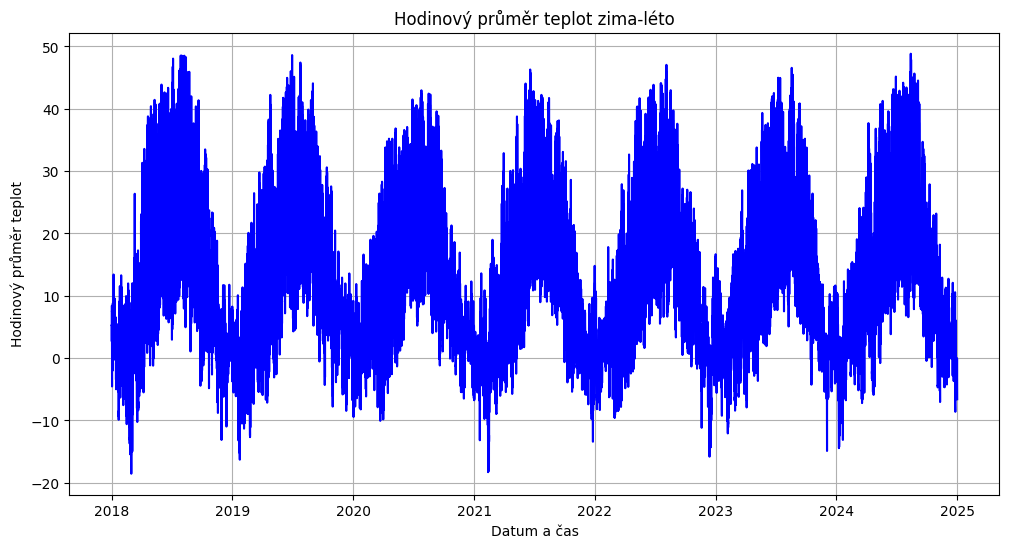

In [37]:
import matplotlib.pyplot as plt

# odfiltrování dat od 1.1.2025
hourly_avg_filtered = hourly_avg[hourly_avg.index <= "2025-01-01"]

# vykreslení line grafu
plt.figure(figsize=(12,6))
plt.plot(hourly_avg_filtered.index, hourly_avg_filtered.values, linestyle='-', color='blue')

plt.title("Hodinový průměr teplot zima-léto")
plt.xlabel("Datum a čas")
plt.ylabel("Hodinový průměr teplot")
plt.grid(True)
plt.show()



In [ ]:
print(combined_df["source_file"].value_counts())



source_file
10m-0-203-0-11621-TPM-201801.csv    4464
10m-0-203-0-11621-TPM-201803.csv    4464
10m-0-203-0-11621-TPM-201807.csv    4464
10m-0-203-0-11621-TPM-201805.csv    4464
10m-0-203-0-11621-TPM-202008.csv    4464
                                    ... 
10m-0-203-0-11621-TPM-201802.csv    4032
10m-0-203-0-11621-TPM-202302.csv    4032
10m-0-203-0-11621-TPM-202202.csv    4032
10m-0-203-0-11621-TPM-202102.csv    4032
10m-0-203-0-11621-TPM-201902.csv    4032
Name: count, Length: 84, dtype: int64


In [ ]:
combined_df["source_file"].value_counts().to_csv("source_files_counts.csv")


In [ ]:
from google.colab import files
files.download("hourly_avg.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(combined_df["source_file"].nunique())


84


# Make data 2025 from JSON

In [23]:
import json
import os
import pandas as pd

# cesta k složce s JSONy
folder_path = "/content/drive/MyDrive/Colab Notebooks/CHMI"

all_data = []

# načtení všech JSON souborů
for filename in os.listdir(folder_path):
    if filename.endswith(".json"):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r") as f:
            data = json.load(f)
            # pokud je soubor seznam objektů, rozbalíme je
            if isinstance(data, list):
                all_data.extend(data)
            else:
                all_data.append(data)

# kontrola prvního záznamu
# print(all_data[0])

# vytvoření DataFrame s podporou vnořených polí
df = pd.json_normalize(all_data, sep='_')
# print(df.columns)



## Make data 2025 from JSON and make line graf

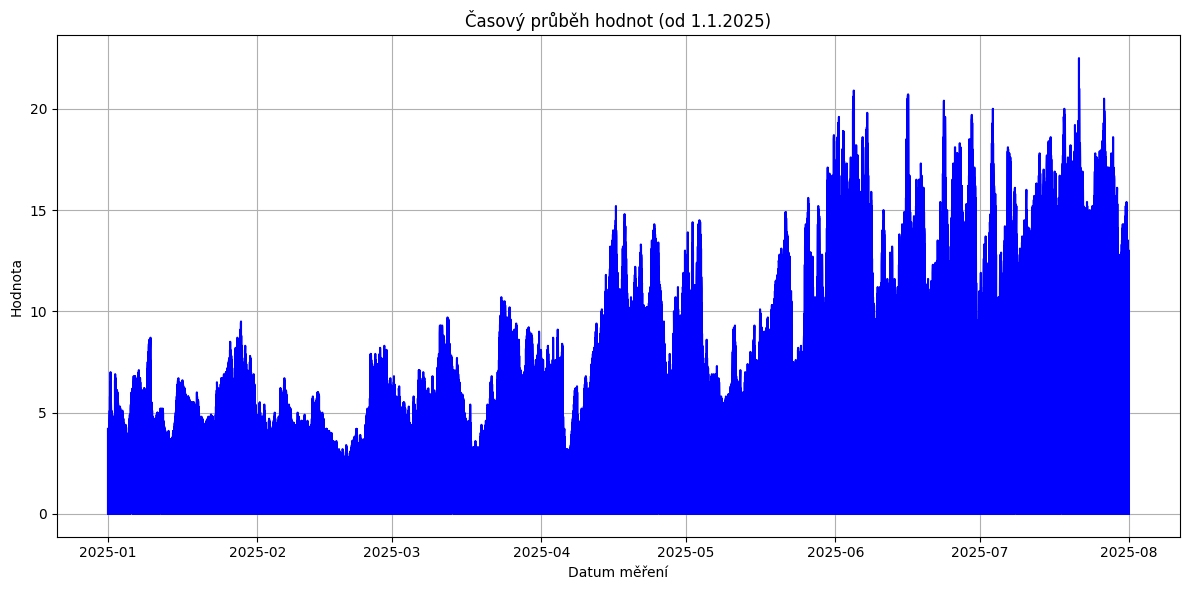

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# rozbalení dat (pokud už máš df_expanded, můžeš začít odtud)
expanded = []
for _, row in df.iterrows():
    for record in row['data_data_values']:
        expanded.append({
            "datumVytvoreni": row['datumVytvoreni'],
            "measurement_id": record[0],
            "typ": record[1],
            "measurement_date": record[2],
            "value": record[3],
            "other": record[4],
            "flag": record[5]
        })

df_expanded = pd.DataFrame(expanded)

# převod na datetime
df_expanded['measurement_date'] = pd.to_datetime(df_expanded['measurement_date'], errors='coerce')

# filtr od 1.1.2025
df_filtered = df_expanded[df_expanded['measurement_date'] >= "2025-01-01"]

# seřazení
df_filtered = df_filtered.sort_values('measurement_date')

# line graf bez značek
plt.figure(figsize=(12,6))
plt.plot(df_filtered['measurement_date'], df_filtered['value'], linestyle='-', color='blue')
plt.title("Časový průběh hodnot (od 1.1.2025)")
plt.xlabel("Datum měření")
plt.ylabel("Hodnota")
plt.grid(True)
plt.tight_layout()
plt.show()



## Make data 2025 from JSON and make line graf from hour average

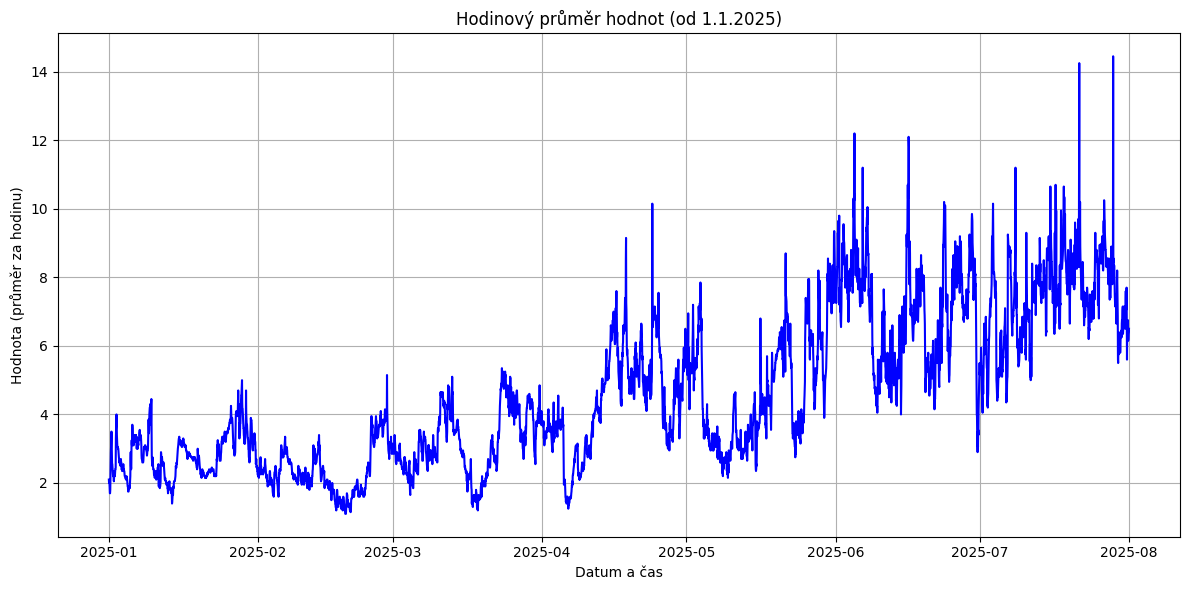

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# předpokládám, že už máš df_expanded s 'measurement_date' a 'value'

# převod na datetime
df_expanded['measurement_date'] = pd.to_datetime(df_expanded['measurement_date'], errors='coerce')

# filtr od 1.1.2025
df_filtered = df_expanded[df_expanded['measurement_date'] >= "2025-01-01"]

# nastavení datumu jako index pro resampling
df_filtered = df_filtered.set_index('measurement_date')

# hodinový průměr
df_hourly = df_filtered['value'].resample("h").mean()

# line graf bez značek
plt.figure(figsize=(12,6))
plt.plot(df_hourly.index, df_hourly.values, linestyle='-', color='blue')
plt.title("Hodinový průměr hodnot (od 1.1.2025)")
plt.xlabel("Datum a čas")
plt.ylabel("Hodnota (průměr za hodinu)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [40]:
# df_hourly.to_csv("hourly_avg_2025.csv")

In [41]:
# from google.colab import files
# files.download("hourly_avg_2025.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
import pandas as pd

# načti oba soubory
df1 = pd.read_csv("hourly_avg.csv", parse_dates=True, index_col=0)
df2 = pd.read_csv("hourly_avg_2025.csv", parse_dates=True, index_col=0)

# sjednotíme název sloupce
df1.rename(columns={"VALUE": "value"}, inplace=True)
df2.rename(columns={"VALUE": "value"}, inplace=True)

# sloučení
merged = pd.concat([df1, df2])

# odstranění duplicit a seřazení
merged = merged[~merged.index.duplicated(keep="first")].sort_index()

merged.to_csv("hourly_avg_merged.csv")



In [49]:
from google.colab import files
files.download("hourly_avg_boiler.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

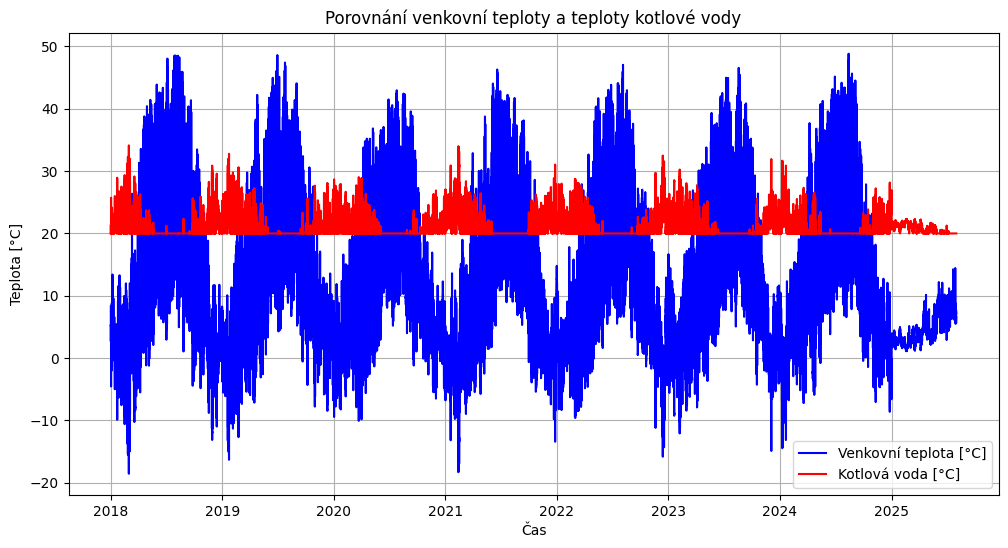

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# venkovní teplota
plt.plot(merged.index, merged["value"], label="Venkovní teplota [°C]", color="blue")

# teplota kotlové vody
plt.plot(merged.index, merged["Boiler_water"], label="Kotlová voda [°C]", color="red")

plt.title("Porovnání venkovní teploty a teploty kotlové vody")
plt.xlabel("Čas")
plt.ylabel("Teplota [°C]")
plt.legend()
plt.grid(True)

plt.show()

In [42]:
import pandas as pd

# Cesta k souboru
file_path = "/Users/Marek/Documents/GitHub/CHMI/hourly_avg_merged_old.csv"

# Načtení CSV
df_merged = pd.read_csv(file_path)

# Ukázat prvních 5 řádků
print(df_merged.head())



                  Unnamed: 0     value
0  2018-01-01 00:00:00+00:00  5.316667
1  2018-01-01 01:00:00+00:00  5.216667
2  2018-01-01 02:00:00+00:00  5.350000
3  2018-01-01 03:00:00+00:00  4.550000
4  2018-01-01 04:00:00+00:00  2.683333


In [43]:
import pandas as pd

# funkce hokejka
def hokejka(temp_in):
    if temp_in <= 5:
        return -0.6 * temp_in + 23
    else:
        return 20


# dopočítat Boiler_water z venkovní teploty (value)
df_merged["Boiler_water"] = df_merged["value"].apply(hokejka)

# přejmenuj první sloupec (původní index) na "Datetime"
df_merged.rename(columns={df_merged.columns[0]: "Datetime"}, inplace=True)

print(df_merged.head())

                    Datetime     value  Boiler_water
0  2018-01-01 00:00:00+00:00  5.316667         20.00
1  2018-01-01 01:00:00+00:00  5.216667         20.00
2  2018-01-01 02:00:00+00:00  5.350000         20.00
3  2018-01-01 03:00:00+00:00  4.550000         20.27
4  2018-01-01 04:00:00+00:00  2.683333         21.39


                       Datetime     value  Boiler_water
10176 2019-03-01 00:00:00+00:00  6.700000          20.0
10177 2019-03-01 01:00:00+00:00  6.950000          20.0
10178 2019-03-01 02:00:00+00:00  7.716667          20.0
10179 2019-03-01 03:00:00+00:00  6.800000          20.0
10180 2019-03-01 04:00:00+00:00  6.650000          20.0


In [57]:
import pandas as pd

# Ujistíme se, že Datetime je datetime typ
df_merged["Datetime"] = pd.to_datetime(df_merged["Datetime"], errors="coerce")

# Nastavit hodnoty Boiler_water na NaN, pokud je datum před 1.3.2019
df_merged.loc[df_merged["Datetime"] < "2019-03-01", "Boiler_water"] = 0

print(df_merged.head(10))


                   Datetime     value Boiler_water
0 2018-01-01 00:00:00+00:00  5.316667            0
1 2018-01-01 01:00:00+00:00  5.216667            0
2 2018-01-01 02:00:00+00:00  5.350000            0
3 2018-01-01 03:00:00+00:00  4.550000            0
4 2018-01-01 04:00:00+00:00  2.683333            0
5 2018-01-01 05:00:00+00:00  4.200000            0
6 2018-01-01 06:00:00+00:00  6.616667            0
7 2018-01-01 07:00:00+00:00  7.350000            0
8 2018-01-01 08:00:00+00:00  7.550000            0
9 2018-01-01 09:00:00+00:00  7.516667            0


In [65]:
df_merged.to_csv("/Users/Marek/Documents/GitHub/CHMI/df_merged1.csv", index=False)

In [7]:
import pandas as pd

# Cesta k souboru
file_path = "/Users/Marek/Documents/GitHub/CHMI/df_merged1.csv"

# Načtení CSV
df_merged1 = pd.read_csv(file_path)

# Ukázat prvních 5 řádků
print(df_merged1.head())

                    Datetime     value  Boiler_water
0  2018-01-01 00:00:00+00:00  5.316667           0.0
1  2018-01-01 01:00:00+00:00  5.216667           0.0
2  2018-01-01 02:00:00+00:00  5.350000           0.0
3  2018-01-01 03:00:00+00:00  4.550000           0.0
4  2018-01-01 04:00:00+00:00  2.683333           0.0


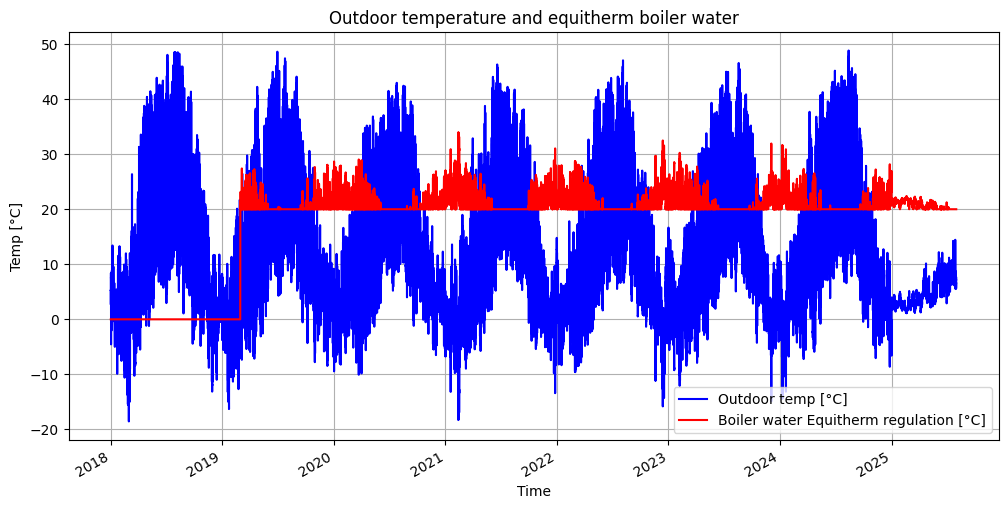

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# převod Datetime na datetime typ
df_merged1["Datetime"] = pd.to_datetime(df_merged1["Datetime"], errors="coerce")

plt.figure(figsize=(12,6))

plt.plot(df_merged1["Datetime"], df_merged1["value"], label="Outdoor temp [°C]", color="blue")
plt.plot(df_merged1["Datetime"], df_merged1["Boiler_water"], label="Boiler water Equitherm regulation [°C]", color="red")

plt.title("Outdoor temperature and equitherm boiler water")
plt.xlabel("Time")
plt.ylabel("Temp [°C]")
plt.gcf().autofmt_xdate()
plt.legend()
plt.grid(True)
plt.show()
blob:vscode-webview://1l0o2aeh1v73lh6e98usc8tk32mvn3to79ug0hn4gikmn9slgicd/2c955784-e36a-4a01-852d-413e5df095de

## Equitherm regulation for red part in the graph Outdoor temperature and equitherm boiler water

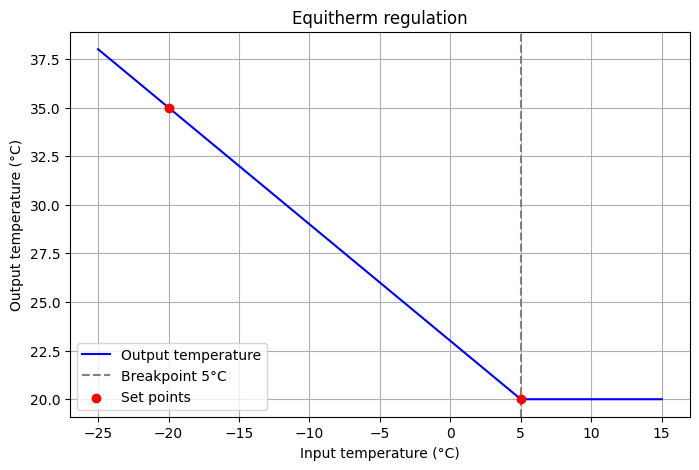

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Funkce typu "hokejka"
def hokejka(temp_in):
    if temp_in <= 5:
        return -0.6 * temp_in + 23
    else:
        return 20

# Data pro graf
temps_in = np.linspace(-25, 15, 200)
temps_out = [hokejka(t) for t in temps_in]

# Vykreslení
plt.figure(figsize=(8, 5))
plt.plot(temps_in, temps_out, label="Output temperature", color="blue")
plt.axvline(x=5, color="gray", linestyle="--", label="Breakpoint 5°C")
plt.scatter([-20, 5], [35, 20], color="red", zorder=5, label="Set points")
plt.title("Equitherm regulation")
plt.xlabel("Input temperature (°C)")
plt.ylabel("Output temperature (°C)")
plt.grid(True)
plt.legend()

# Uložení grafu do souboru
plt.savefig("Assign_Equit_graf.png")  # uloží graf jako PNG

plt.show()



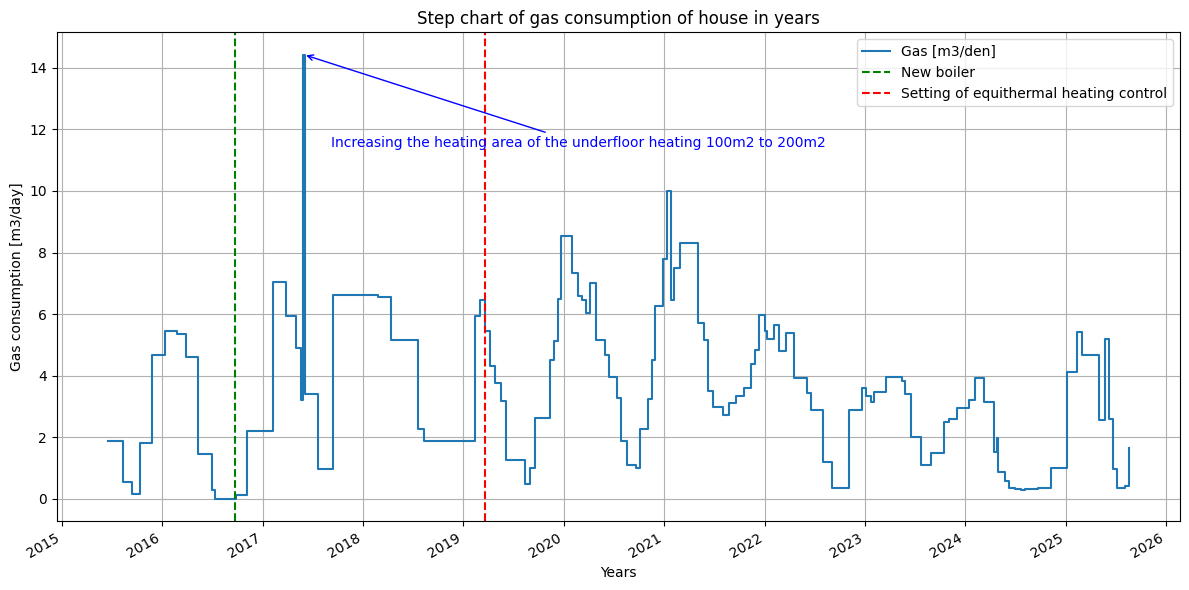

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



# Google Sheets setting
sheet_id = "17baRw1WgNKmUhdUqFFTEy7tN7PGzdNso-A471-maPc4"
sheet_name = "Sheet1"

url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

# Loading
df = pd.read_csv(url, usecols=[0, 9], decimal=",")
df = df.rename(columns={df.columns[0]: 'Cas'})
df['Cas'] = pd.to_datetime(df['Cas'], dayfirst=True, errors='coerce')
df = df.set_index('Cas')
df.columns = df.columns.str.strip()
df = df.apply(pd.to_numeric, errors='coerce')

# Graph printing
fig, ax = plt.subplots(figsize=(12, 6))
df.plot(ax=ax, drawstyle='steps-post')

# Najdi index a hodnotu peaku (např. maximum)
peak_y = df.iloc[:, 0].max()
peak_x = df.iloc[:, 0].idxmax()

# Přidej anotaci do grafu
plt.annotate('Increasing the heating area of the underfloor heating 100m2 to 200m2',
             xy=(peak_x, peak_y),
             xytext=(peak_x + pd.Timedelta(days=100), peak_y - 3),
             arrowprops=dict(arrowstyle='->', color='blue'),
             fontsize=10, color='blue')

# Setting of the X-axis
ax.xaxis.set_major_locator(mdates.YearLocator())  # 1x za rok
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Zobrazit jen rok

# Labels and style
ax.set_title("Step chart of gas consumption of house in years")
ax.set_xlabel("Years")
ax.set_ylabel("Gas consumption [m3/day]")
ax.grid(True)

# Vertical lines
ax.axvline(pd.Timestamp("2016-09-23"), color='green', linestyle='--', linewidth=1.5, label='New boiler')
ax.axvline(pd.Timestamp("2019-03-20"), color='red', linestyle='--', linewidth=1.5, label='Setting of equithermal heating control')

# Legend
ax.legend()
plt.tight_layout()
plt.show()

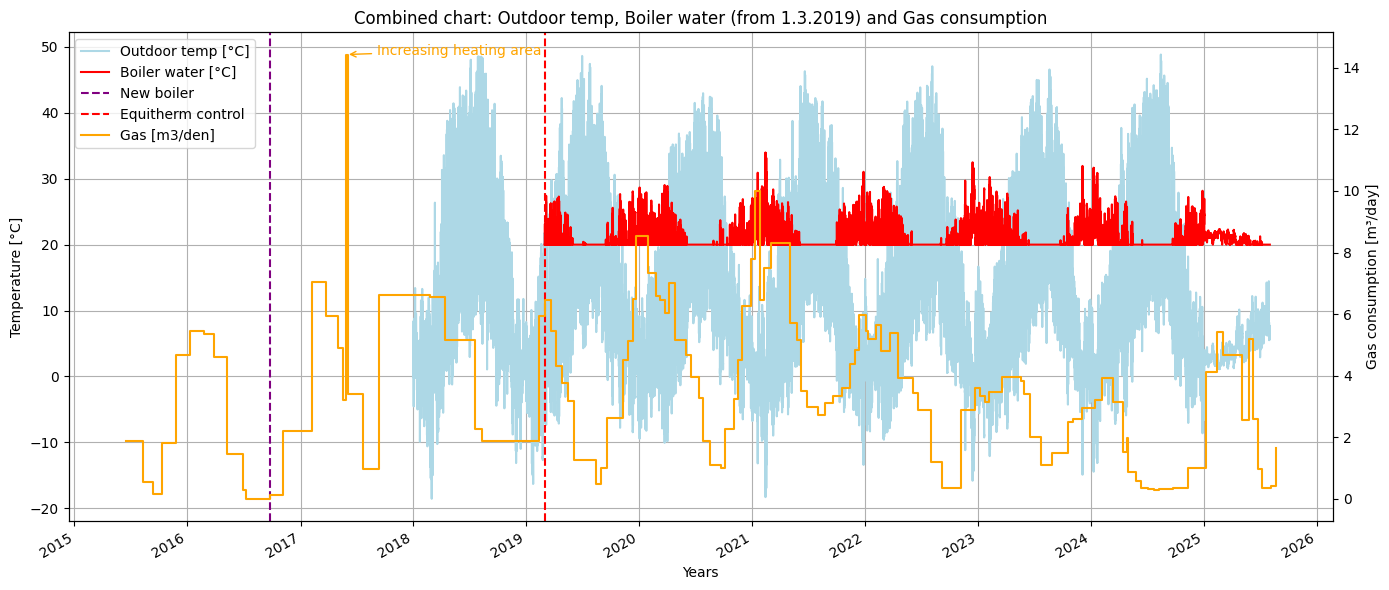

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- 1. Načtení dat z Google Sheets (gas) ---
sheet_id = "17baRw1WgNKmUhdUqFFTEy7tN7PGzdNso-A471-maPc4"
sheet_name = "Sheet1"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

df_gas = pd.read_csv(url, usecols=[0, 9], decimal=",")
df_gas = df_gas.rename(columns={df_gas.columns[0]: 'Cas'})
df_gas['Cas'] = pd.to_datetime(df_gas['Cas'], dayfirst=True, errors='coerce')
df_gas = df_gas.set_index('Cas')
df_gas.columns = df_gas.columns.str.strip()
df_gas = df_gas.apply(pd.to_numeric, errors='coerce')

# --- 2. df_merged1 má Datetime jako index ---
df_merged1.index = pd.to_datetime(df_merged1.index, errors='coerce')

# Nastavit Boiler_water na NaN před 1.3.2019
df_merged1.loc[df_merged1.index < "2019-03-01", "Boiler_water"] = pd.NA

# --- 3. Vykreslení grafu ---
fig, ax1 = plt.subplots(figsize=(14,6))

# Primární osa Y: teploty
ax1.plot(df_merged1.index, df_merged1["value"], label="Outdoor temp [°C]", color="lightblue")
ax1.plot(df_merged1.index, df_merged1["Boiler_water"], label="Boiler water [°C]", color="red")
ax1.set_xlabel("Years")
ax1.set_ylabel("Temperature [°C]")
ax1.grid(True)

# Formátování osy X podle let
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()

# Sekundární osa Y: spotřeba plynu
ax2 = ax1.twinx()
df_gas.plot(ax=ax2, drawstyle='steps-post', label='Gas consumption [m3/day]', color='orange', legend=False)
ax2.set_ylabel("Gas consumption [m³/day]")

# Anotace peaku pro gas
peak_y = df_gas.iloc[:,0].max()
peak_x = df_gas.iloc[:,0].idxmax()
ax2.annotate('Increasing heating area',
             xy=(peak_x, peak_y),
             xytext=(peak_x + pd.Timedelta(days=100), peak_y - 0),
             arrowprops=dict(arrowstyle='->', color='orange'),
             fontsize=10, color='orange')

# Svislé čáry
ax1.axvline(pd.Timestamp("2016-09-23"), color='purple', linestyle='--', linewidth=1.5, label='New boiler')
ax1.axvline(pd.Timestamp("2019-03-01"), color='red', linestyle='--', linewidth=1.5, label='Equitherm control')

# Sloučená legenda
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Titulek a layout
plt.title("Combined chart: Outdoor temp, Boiler water (from 1.3.2019) and Gas consumption")
plt.tight_layout()

# Uložení grafu do PNG
fig.savefig("RealEquit_graf.png", dpi=300, bbox_inches='tight')

# Zobrazení grafu
plt.show()
